# Calculo Iterativo del Ejercicio Tipo Cercha

El objetivo del ejercicio es determinar la grafica esfuerzo deformacion utilizando el metodo de la rigidez

In [1]:
# Importamos dependencias
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

In [2]:
# Creamos una clase Barra que tenga la capacidad de crear la matriz de rigidez del elemento en coordenas basicas, locales, y globales.
# El elemento tiene incluida la relacion constitutiva
# La matriz de rigidez es determinada a partir de la deformacion del elemento

class Barra:
    def __init__(self,L,A,alpha,fy,Es,plotPropiedades=False):
        self.L=L
        self.A=A
        self.alpha=alpha
        self.fy=fy
        self.Es=Es
        self.Tbl=np.array([[-1,1]])
        c=math.cos(math.radians(self.alpha))
        s=math.sin(math.radians(self.alpha))
        self.Tlg=np.array([
                            [c,s,0,0],
                            [0,0,c,s]
                          ])
        
        self.propiedades(plot=plotPropiedades)
        
    def propiedades(self,plot=False):
        self.ey=self.fy/self.Es
        self.e=np.array([-2*self.ey,-1.5*self.ey,-self.ey,0,self.ey,1.5*self.ey,2*self.ey])
        self.f=np.array([-self.fy,-self.fy,-self.fy,0,self.fy,self.fy,self.fy])
        
        self.E=np.diff(self.f)/np.diff(self.e)
        self.eE=np.diff(self.e)
        self.E=np.insert(self.E,[len(self.E)//2],[0])
        
        if plot is True:
            plt.figure(figsize=(5,5),dpi=100)
            plt.plot(self.e,self.f)
            plt.figure(figsize=(5,5),dpi=100)
            plt.plot(self.e,self.E)
 
            
    def deformacionesGlobalesLocales(self,uGlobal):
        uLocal=self.Tlg@uGlobal
        uBasic=self.Tbl@uLocal
        return uLocal, uBasic
        
    def calculoFuerza(self,uGlobal):
        _,uBasic=self.deformacionesGlobalesLocales(uGlobal)
        epsilon=uBasic/self.L
        interp_function_force=interp1d(self.e, self.f,fill_value='extrapolate')
        interp_function_E=interp1d(self.e, self.E,fill_value='extrapolate')
        valueForceBasic=interp_function_force(epsilon)*self.A
        valueE=interp_function_E(epsilon)
        valueForceGlobal=self.Tlg.T@self.Tbl.T@valueForceBasic
        return valueForceBasic, valueForceGlobal, valueE
    
    def stiffness(self,F):
        self.Kb=self.A*self.Es/self.L
        self.Kl=self.Tbl.T * self.Kb * self.Tbl
        self.Kg=np.transpose(self.Tlg)@self.Kl@self.Tlg

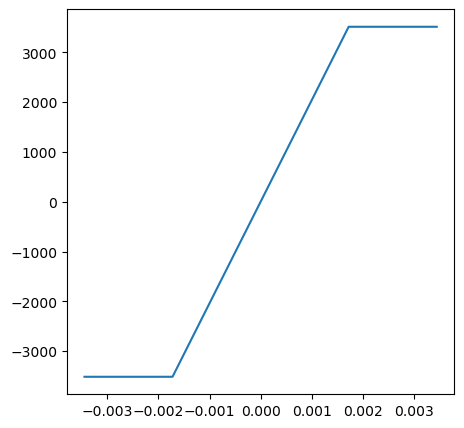

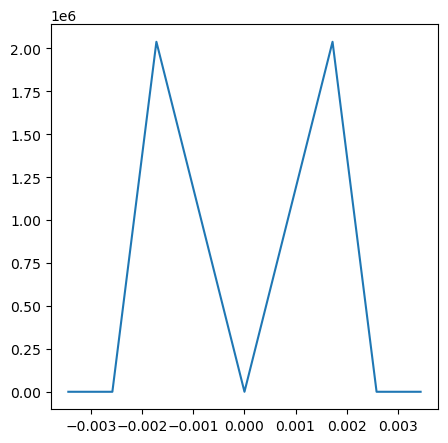

In [3]:
# Datos
P=500 #[kgf]
B1=Barra(500*2**0.5, 25, 135, 50*70.3, 29000*70.3,plotPropiedades=True)
B2=Barra(500, 25, 90, 50*70.3, 29000*70.3)
B3=Barra(500*2**0.5, 25, 45, 50*70.3, 29000*70.3)

Delta=30

Desplazamiento=np.linspace(-0.01, -3,Delta)

Text(0, 0.5, 'Fuerza')

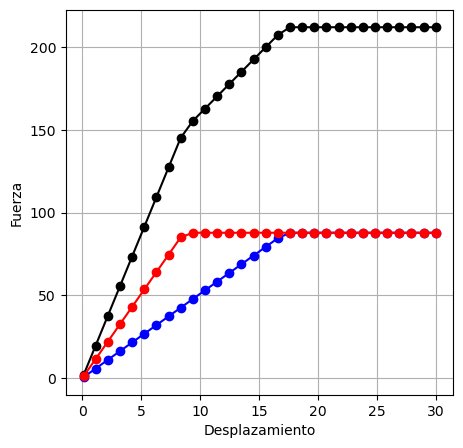

In [6]:
# Calculos
B1_force=np.zeros([2,len(Desplazamiento)])
B2_force=np.zeros([2,len(Desplazamiento)])
B3_force=np.zeros([2,len(Desplazamiento)])

j=0
for i in Desplazamiento:
    uGlobal=np.array([[0],[i],[0],[0]])
    B1_local,B1_global,_=B1.calculoFuerza(uGlobal)
    B1_force[0,j]=B1_local
    B1_force[1,j]=B1_global[1]
    B2_local,B2_global,_=B2.calculoFuerza(uGlobal)
    B2_force[0,j]=B2_local
    B2_force[1,j]=B2_global[1]
    B3_local,B3_global,_=B3.calculoFuerza(uGlobal)
    B3_force[0,j]=B3_local
    B3_force[1,j]=B3_global[1]
    j=j+1

plt.figure(figsize=(5,5),dpi=100)
plt.plot(Desplazamiento*-10,-(B1_force[1,:]+B2_force[1,:]+B3_force[1,:])/1000,color='k',marker='o')
plt.plot(Desplazamiento*-10,B1_force[0,:]/1000,color='b',marker='o')
plt.plot(Desplazamiento*-10,B2_force[0,:]/1000,color='r',marker='o')
plt.grid(True)
plt.xlabel('Desplazamiento')
plt.ylabel('Fuerza')